In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sb

# Setting Seaborn Style
sb.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:

# Loading Boston Housing Dataset
boston_train = pd.read_csv('train.csv')

# Top 5 rows of the boston dataset
boston_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [3]:

# Loading Boston Housing Dataset
boston_test = pd.read_csv('test.csv')

# Top 5 rows of the boston dataset
boston_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [4]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Factors : \t", boston_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston_train.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Factors : 	 14
		Number of Samples : 	 400


In [5]:
boston_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


Exploratory Data Analysis
Let's Explore more on the data

In [6]:
# TODO : Descriptive Statistics on Boston Housing Dataset
boston_train.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# TODO : Check for null values and visualizing it using heatmap
boston_train.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# TODO : Let's check for data types of all the columns
boston_train.dtypes
#All are numerical values. So no need of encoding

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<Figure size 576x432 with 0 Axes>

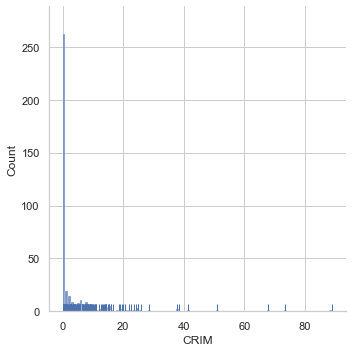

<Figure size 576x432 with 0 Axes>

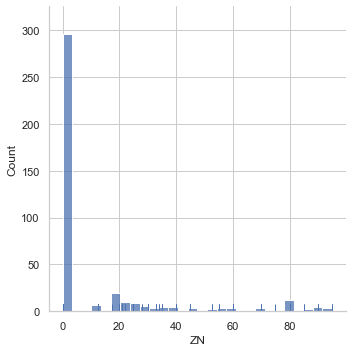

<Figure size 576x432 with 0 Axes>

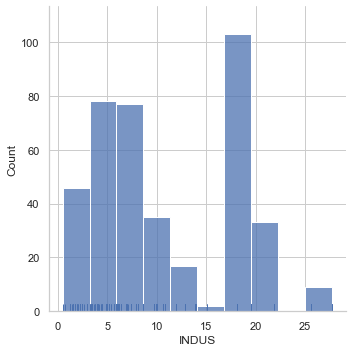

<Figure size 576x432 with 0 Axes>

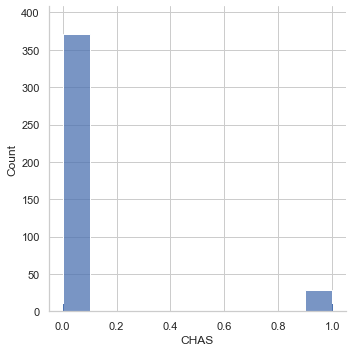

In [9]:
plt.figure(figsize=(8, 6))
sb.displot(boston_train['CRIM'], rug = True)
plt.savefig('crim.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['ZN'], rug = True)
plt.savefig('zn.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['INDUS'], rug = True)
plt.savefig('indus.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['CHAS'], rug = True)
plt.savefig('chas.png')


<Figure size 576x432 with 0 Axes>

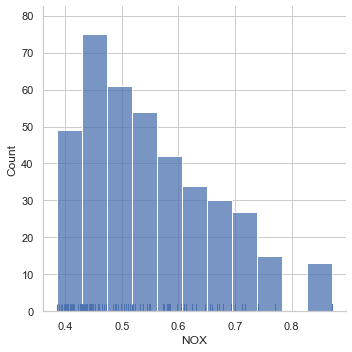

<Figure size 576x432 with 0 Axes>

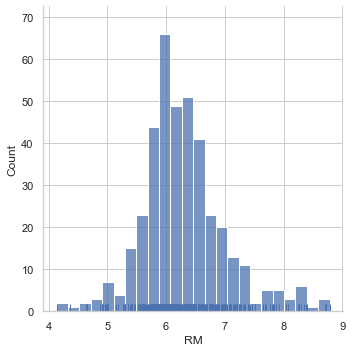

<Figure size 576x432 with 0 Axes>

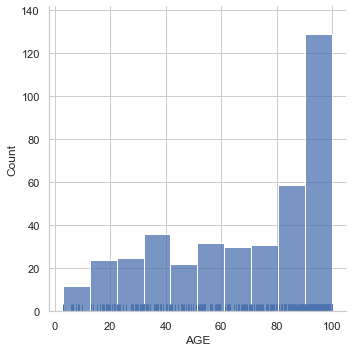

<Figure size 576x432 with 0 Axes>

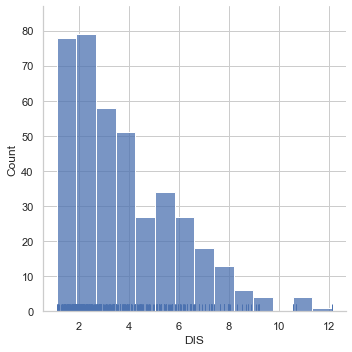

In [10]:
plt.figure(figsize=(8, 6))
sb.displot(boston_train['NOX'], rug = True)
plt.savefig('nox.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['RM'], rug = True)
plt.savefig('rm.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['AGE'], rug = True)
plt.savefig('age.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['DIS'], rug = True)
plt.savefig('dis.png')

<Figure size 576x432 with 0 Axes>

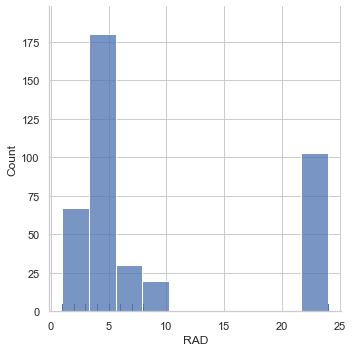

<Figure size 576x432 with 0 Axes>

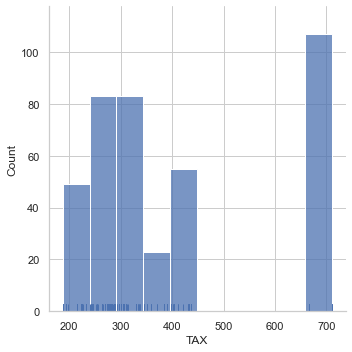

<Figure size 576x432 with 0 Axes>

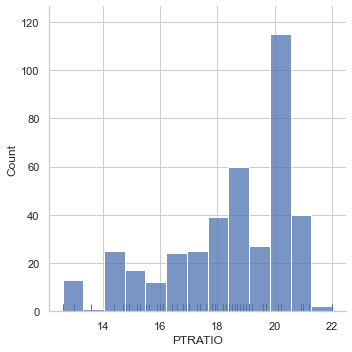

<Figure size 576x432 with 0 Axes>

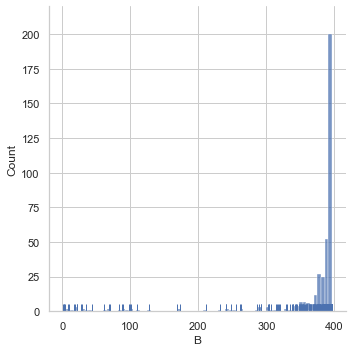

In [11]:
plt.figure(figsize=(8, 6))
sb.displot(boston_train['RAD'], rug = True)
plt.savefig('rad.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['TAX'], rug = True)
plt.savefig('tax.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['PTRATIO'], rug = True)
plt.savefig('ptration.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['B'], rug = True)
plt.savefig('b.png')

<Figure size 576x432 with 0 Axes>

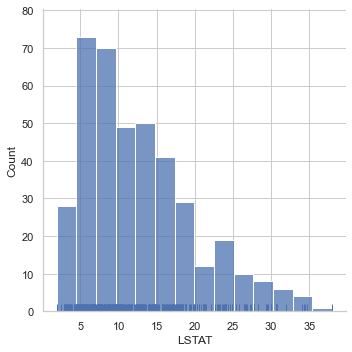

<Figure size 576x432 with 0 Axes>

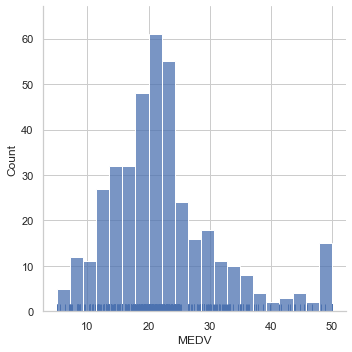

In [12]:
plt.figure(figsize=(8, 6))
sb.displot(boston_train['LSTAT'], rug = True)
plt.savefig('lstat.png')

plt.figure(figsize=(8, 6))
sb.displot(boston_train['MEDV'], rug = True)
plt.savefig('medv.png')

<Figure size 144x144 with 0 Axes>

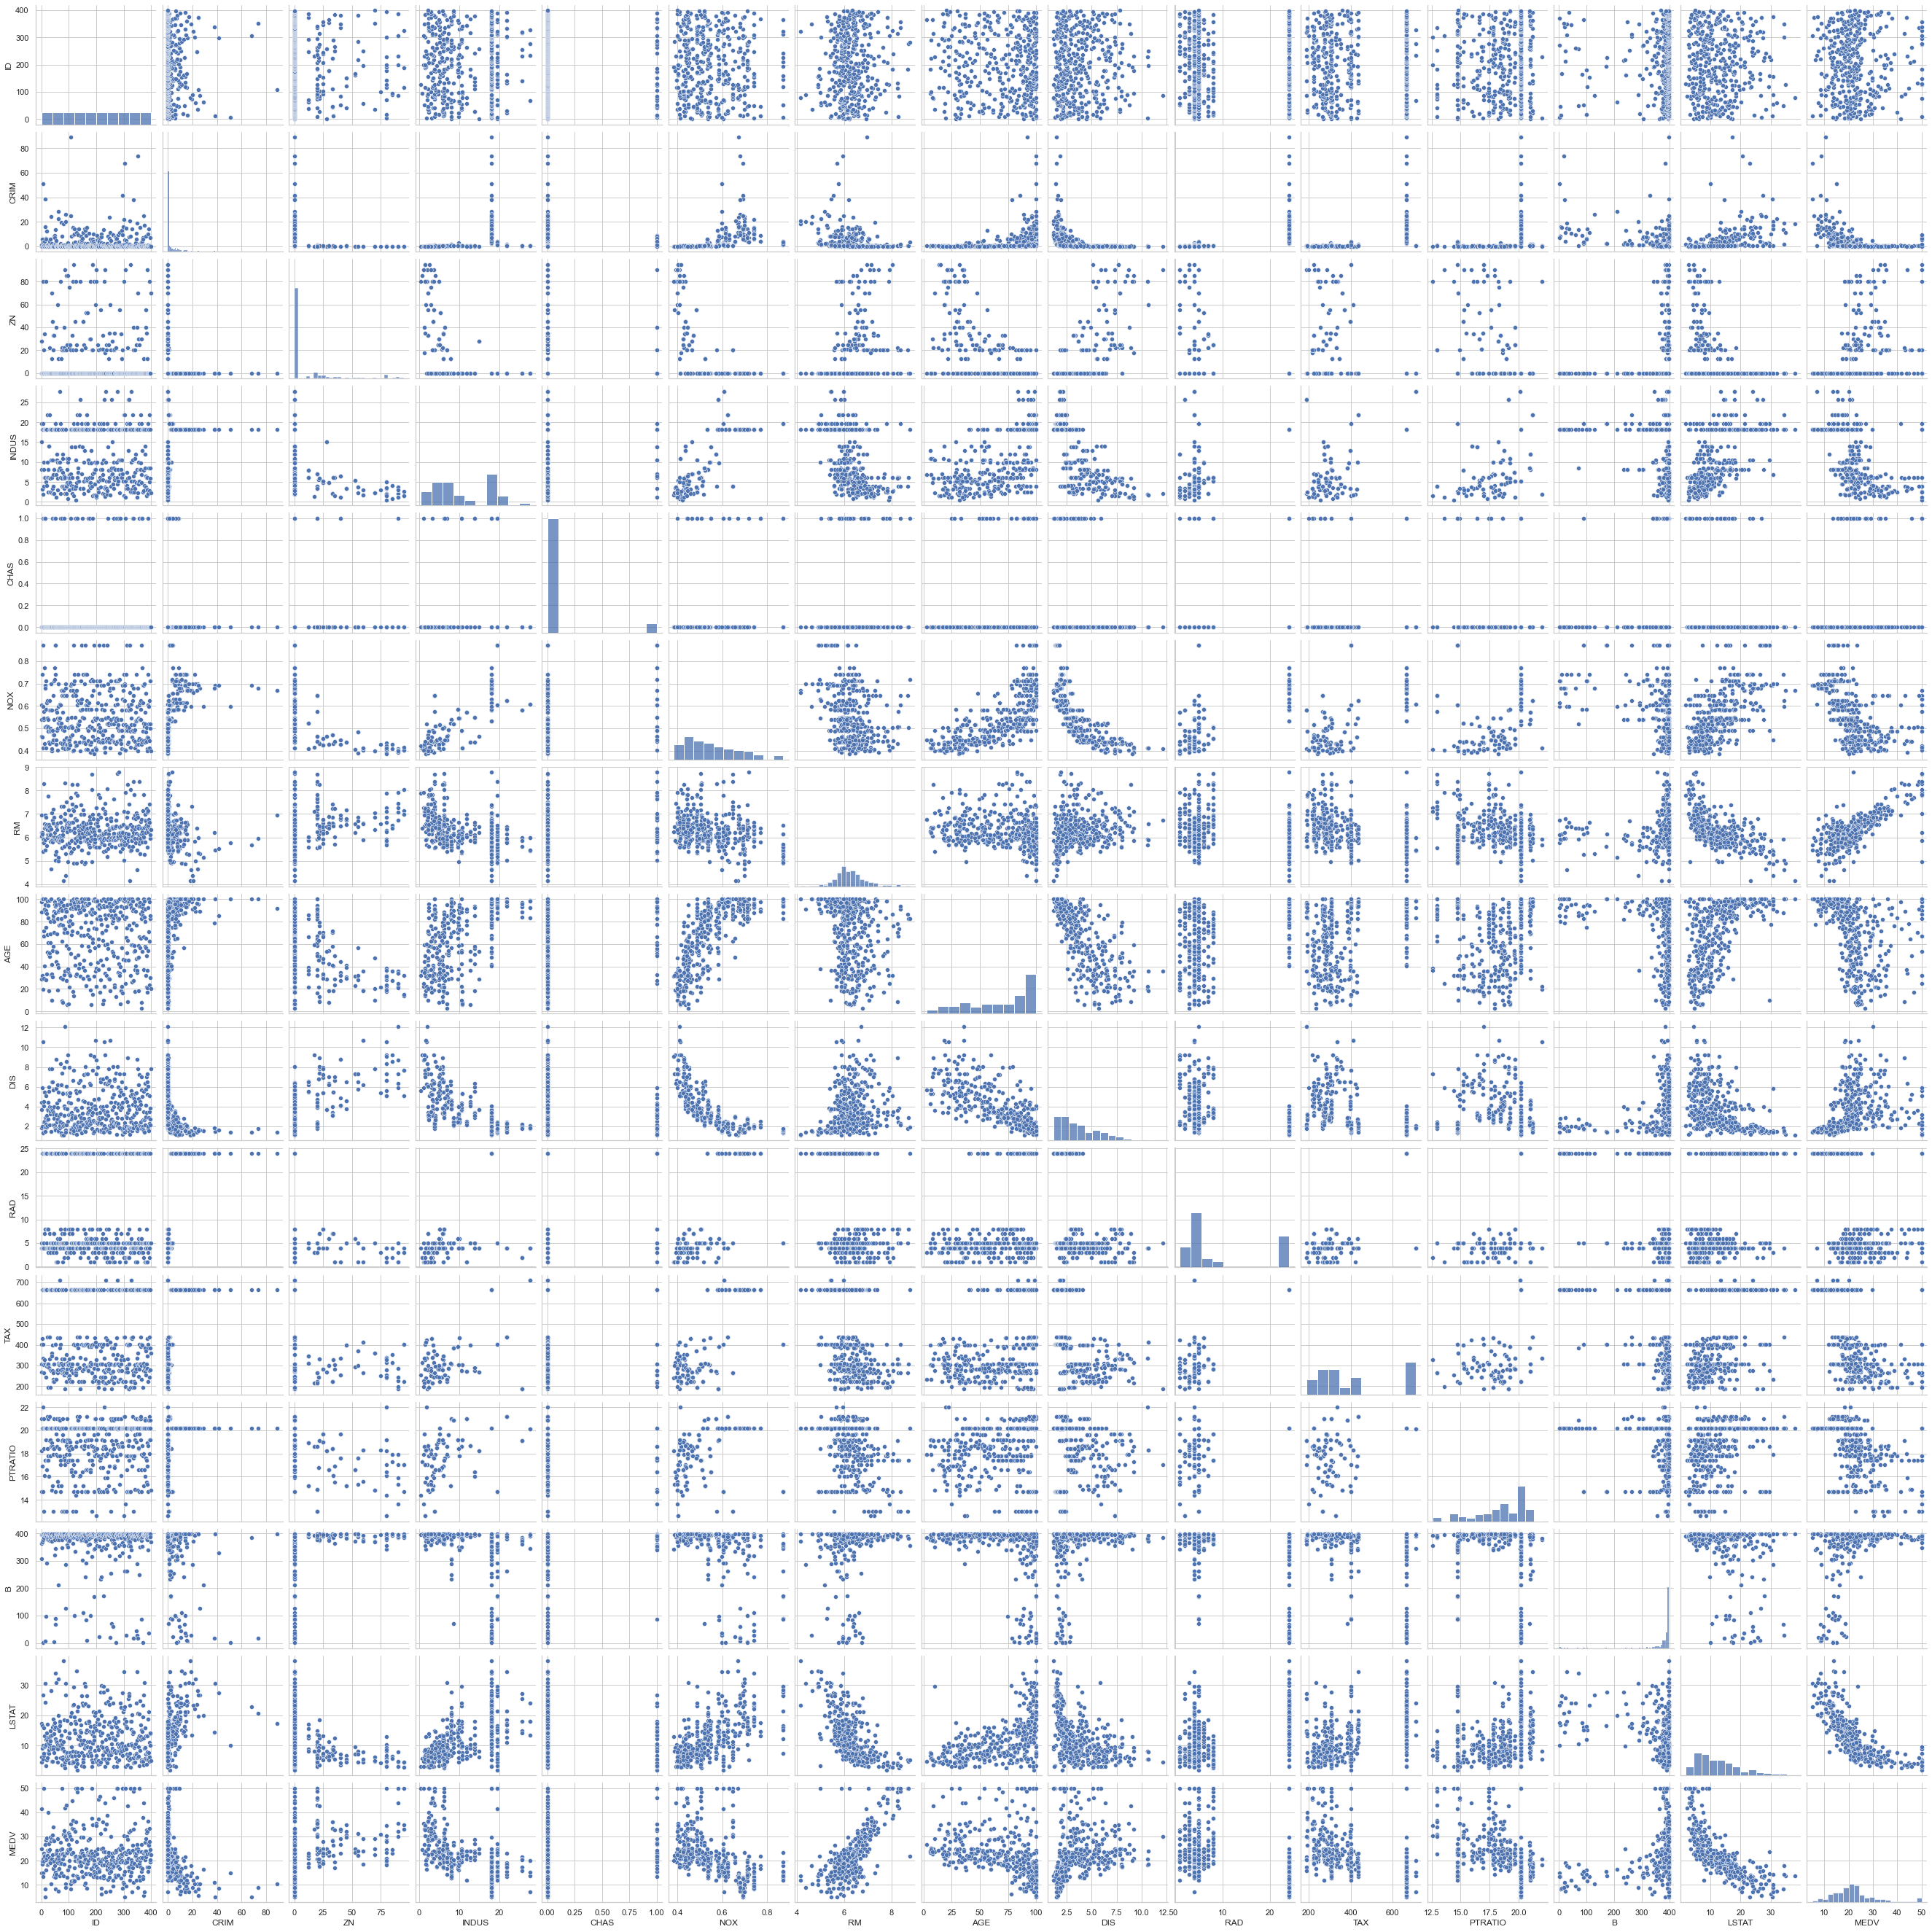

In [13]:
plt.figure(figsize  = (2, 2))
sb.pairplot(boston_train)
plt.savefig('pairplot.png')

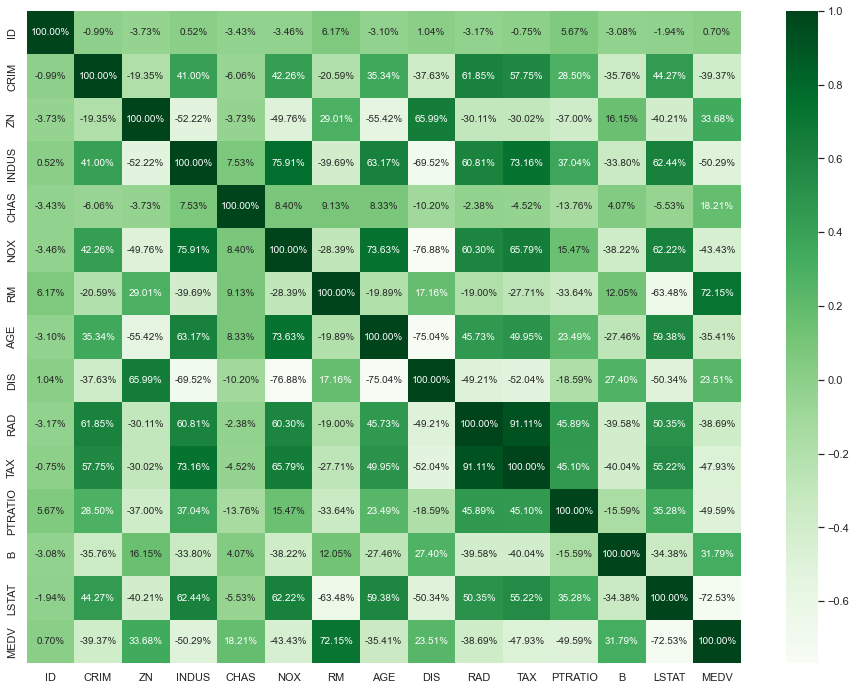

In [14]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sb.heatmap(boston_train.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.savefig('features_correlation.png')

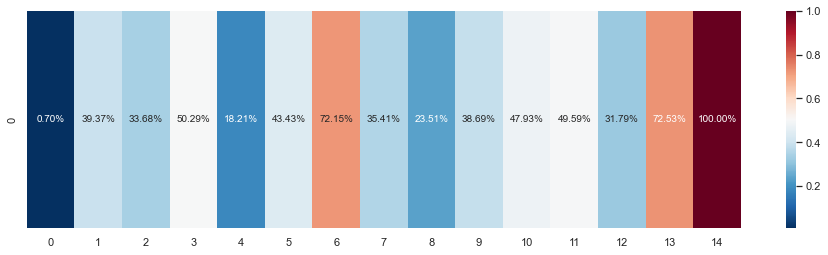

In [15]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston_train.corrwith(boston_train['MEDV'])

plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('correlation_with_price.png')

In [16]:
# Let's see the features having more correlation
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.725281
RM         0.721489
INDUS      0.502898
PTRATIO    0.495904
TAX        0.479308
NOX        0.434271
CRIM       0.393693
RAD        0.386922
AGE        0.354106
ZN         0.336805
B          0.317910
DIS        0.235087
CHAS       0.182096
ID         0.006956
dtype: float64

In [17]:
# Arranging features based on features importance
features_arranged_on_importance = corr_with_medv[:-1].abs().sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'INDUS', 'PTRATIO', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN', 'B', 'DIS', 'CHAS', 'ID'],
      dtype='object')

In [18]:
y = boston_train['MEDV'].values


In [19]:
# Arranging columns based on features importance
new_boston_train = boston_train[features_arranged_on_importance]
new_boston_train.head()

,LSTAT,RM,INDUS,PTRATIO,TAX,NOX,CRIM,RAD,AGE,ZN,B,DIS,CHAS,ID
0,17.28,6.047,8.14,21.0,307.0,0.538,0.95577,4,88.8,0.0,306.38,4.4534,0,0
1,6.21,6.211,15.04,18.2,270.0,0.464,0.02875,4,28.9,28.0,396.33,3.6659,0,1
2,4.59,6.943,19.58,14.7,403.0,0.605,1.22358,5,97.4,0.0,363.43,1.8773,0,2
3,16.59,6.219,18.10,20.2,666.0,0.740,5.66637,24,100.0,0.0,395.69,2.0048,0,3
4,9.09,6.144,3.24,16.9,430.0,0.460,0.04544,4,32.2,0.0,368.57,5.8736,0,4


In [20]:
# Getting boston values
X = new_boston_train.values
X = X[:, :6]

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

Training Score :  0.6790805236787887
Testing Score  :  0.7390205182350991


In [23]:
predicted_house_price = linear_model.predict(X_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[22.00032668 16.88290703 22.36940482 17.8699654  26.71779208 15.93163561
 19.52439597 25.12322817 25.31761141 34.54559418 18.75656016 22.67103999
 24.18521494 23.94168153 14.52162748 33.01528679 21.79703804 26.45799463
 29.06926531 26.16649689 25.07985093 12.55029017 18.3429827  25.57838796
 16.9123654  21.59897861 33.745425   25.26262212 21.75777538 25.3315483
 28.02314767 20.26635551 15.18173707 23.7870982  35.95962976 17.00049512
 37.80418434 22.54392118 22.68338646 21.8526832  19.62191096 10.48002635
 27.33771923 33.31987673 25.83458341 27.66356375 26.73028473 19.49879954
 19.0650716  16.0989109  28.01148591 10.52333483 35.1502916  25.02400083
 24.36001634 18.15400858 26.42227928 13.33398474 21.74014036 30.44828987
 21.04936212 22.00179587 18.52972204 25.16888387 28.50712862 21.78749725
 14.67165725 14.98365849 31.91522395 25.10760488 32.89101651 17.40167348
 20.77186499 18.14669226 30.00067693 22.07879185 17.49280206 14.43181778
 19.41829631 25.85581675]


In [24]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
    Predicted_Prices  Actual_Prices
0          22.000327           20.6
1          16.882907           14.1
2          22.369405           29.6
3          17.869965           16.1
4          26.717792           23.9
..               ...            ...
75         22.078792           18.9
76         17.492802           13.8
77         14.431818           13.4
78         19.418296           23.1
79         25.855817           24.7

[80 rows x 2 columns]


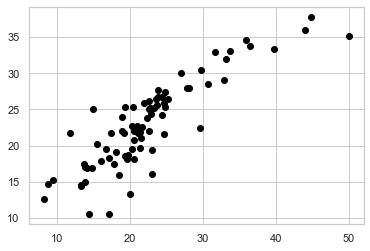

In [25]:
plt.scatter(y_test, predicted_house_price, color='black')
plt.show()